# python数据归一化及三种方法详解

数据标准化（归一化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。以下是三种常用的归一化方法：

## min-max标准化（Min-Max Normalization）

也称为离差标准化，是对原始数据的线性变换，使结果值映射到[0 , 1]之间。转换函数如下：

其中max为样本数据的最大值，min为样本数据的最小值。这种方法有个缺陷就是当有新数据加入时，可能导致max和min的变化，需要重新定义。

min-max标准化方法是对原始数据进行线性变换。设minA和maxA分别为属性A的最小值和最大值，将A的一个原始值x通过min-max标准化映射成在区间[0,1]中的值x'，其公式为：

新数据=（原数据-最小值）/（最大值-最小值）

LaTex：{x}_{normalization}=\frac{x-Min}{Max-Min}

这种方法能使数据归一化到一个区域内，同时不改变原来的数据结构。

min-max标准化python代码如下：

In [1]:
import numpy as np
arr = np.asarray([0, 10, 50, 80, 100])
for x in arr:
  x = float(x - np.min(arr))/(np.max(arr)- np.min(arr))
  print(x)

# output
# 0.0
# 0.1
# 0.5
# 0.8
# 1.0

0.0
0.1
0.5
0.8
1.0


使用这种方法的目的包括：

1、对于方差非常小的属性可以增强其稳定性；

2、维持稀疏矩阵中为0的条目。

下面将数据缩至0-1之间，采用MinMaxScaler函数

In [5]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1., 2.],
    [ 2., 0., 0.],
    [ 0., 1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_minMax = min_max_scaler.fit_transform(X)
print(X_minMax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


最后输出：
 ~~~
array([[ 0.5 , 0. , 1. ],
[ 1. , 0.5 , 0.33333333],
[ 0. , 1. , 0. ]])
~~~

测试用例：

注意：这些变换都是对列进行处理。

当然，在构造类对象的时候也可以直接指定最大最小值的范围：feature_range=(min, max)，此时应用的公式变为：

In [8]:
X_std=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_minmax=X_std/(X.max(axis=0)-X.min(axis=0))+X.min(axis=0)
X_minmax

array([[ 0.25      , -1.        , -0.66666667],
       [ 0.5       , -0.75      , -0.88888889],
       [ 0.        , -0.5       , -1.        ]])

## Z-score标准化方法
也称为均值归一化(mean normaliztion)， 给予原始数据的均值（mean）和标准差（standard deviation）进行数据的标准化。经过处理的数据符合标准正态分布，即均值为0，标准差为1。转化函数为：

训练集归一化处理

mean_of_feature_cols = np.mean(train_features, axis=0)

train_features = (train_features - mean_of_feature_cols) / 255.

测试集归一化处理

test_features = (test_features - mean_of_feature_cols) / 255.

标签的OneHot化处理

for i in np.arange(len(train_labels)):

one_hot_labels[i, train_labels[i]] = 1//

其中 μμ 为所有样本数据的均值，σσ为所有样本数据的标准差。

这种方法基于原始数据的均值（mean）和标准差（standard deviation）进行数据的标准化。将A的原始值x使用z-score标准化到x'。

z-score标准化方法适用于属性A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。

新数据=（原数据-均值）/标准差

LaTex：{x}_{normalization}=\frac{x-\mu }{\sigma }

这种方法适合大多数类型数据，也是很多工具的默认标准化方法。标准化之后的数据是以0为均值，方差为以的正太分布。但是Z-Score方法是一种中心化方法，会改变原有数据的分布结构，不适合用于对稀疏数据做处理。

很多时候数据集会存在稀疏特征，表现为标准差小，很多元素值为0，最常见的稀疏数据集是用来做协同过滤的数据集，绝大部分数据都是0。对稀疏数据做标准化，不能采用中心化的方式，否则会破坏稀疏数据的结构。

In [9]:
import numpy as np
arr = np.asarray([0, 10, 50, 80, 100])
for x in arr:
    x = float(x - arr.mean())/arr.std()
    print(x)

# output
# -1.24101045599
# -0.982466610991
# 0.0517087689995
# 0.827340303992
# 1.34442799399

-1.241010455988046
-0.9824666109905364
0.051708768999501914
0.8273403039920306
1.3444279939870498


## 用于稀疏数据的MaxAbs
最大值绝对值标准化（MaxAbs）即根据最大值的绝对值进行标准化，假设原转换的数据为x，新数据为x'，那么x'=x/|max|，其中max为x锁在列的最大值。
该方法的数据区间为[-1, 1]，也不破坏原数据结构的特点，因此也可以用于稀疏数据，一些稀疏矩阵。

## 针对离群点的RobustScaler
有些时候，数据集中存在离群点，用Z-Score进行标准化，但是结果不理想，因为离群点在标准化后丧失了利群特性。RobustScaler针对离群点做标准化处理，该方法对数据中心化的数据的缩放健壮性有更强的参数控制能力。

python实现

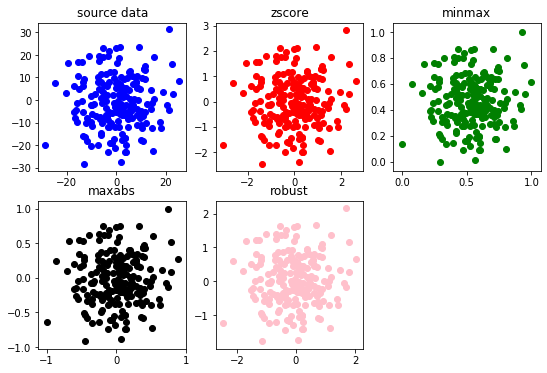

In [10]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
 
# 导入数据
data = make_moons(n_samples=200, noise=10)[0]
 
#Z-Score标准化
#建立StandardScaler对象
zscore = preprocessing.StandardScaler()
# 标准化处理
data_zs = zscore.fit_transform(data)
 
#Max-Min标准化
#建立MinMaxScaler对象
minmax = preprocessing.MinMaxScaler()
# 标准化处理
data_minmax = minmax.fit_transform(data)
 
#MaxAbs标准化
#建立MinMaxScaler对象
maxabs = preprocessing.MaxAbsScaler()
# 标准化处理
data_maxabs = maxabs.fit_transform(data)
 
#RobustScaler标准化
#建立RobustScaler对象
robust = preprocessing.RobustScaler()
# 标准化处理
data_rob = robust.fit_transform(data)
 
# 可视化数据展示
# 建立数据集列表
data_list = [data, data_zs, data_minmax, data_maxabs, data_rob]
# 创建颜色列表
color_list = ['blue', 'red', 'green', 'black', 'pink']
# 创建标题样式
title_list = ['source data', 'zscore', 'minmax', 'maxabs', 'robust']
 
# 设置画幅
plt.figure(figsize=(9, 6))
# 循环数据集和索引
for i, dt in enumerate(data_list):
  # 子网格
  plt.subplot(2, 3, i+1)
  # 数据画散点图
  plt.scatter(dt[:, 0], dt[:, 1], c=color_list[i])
  # 设置标题
  plt.title(title_list[i])
# 图片储存 
# plt.savefig('xx.png')
# 图片展示
plt.show()

In [11]:
# numpy 归一化和标准化 代码实现
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
     
def standardization(data, axis=0):
    mu = np.mean(data, axis=axis)
    sigma = np.std(data, axis=axis)
    return (data - mu) / sigma

import numpy as np
arr = np.asarray([0, 10, 50, 80, 100])
x=normalization(arr)
print(x)

y=standardization(arr)
print(y) 

[0.  0.1 0.5 0.8 1. ]
[-1.24101046 -0.98246661  0.05170877  0.8273403   1.34442799]


In [30]:
import numpy as np

Z=np.random.random((6,6))
print("原始数据：\n", Z)
Zmax,Zmin=Z.max(axis=0),Z.min(axis=0)
print("Zmax, Zmin","\n", Zmax,"\n", Zmin)
Z1=(Z-Zmin)/(Zmax-Zmin)
print("min-max:\n", Z1)

# numpy 按行归一化
# print("原始数据：\n", Z)
Zmax,Zmin=Z.max(axis=1),Z.min(axis=1)
print("Zmax, Zmin","\n", Zmax,"\n", Zmin)
Z2=((Z.T-Zmin)/(Zmax-Zmin)).T
print("min-max:\n", Z2)


原始数据：
 [[0.26987061 0.30503689 0.18074829 0.71231921 0.53790694 0.18338524]
 [0.25143945 0.17322976 0.49344212 0.1935668  0.03157246 0.17521832]
 [0.17618243 0.11543254 0.48427864 0.32676317 0.38643553 0.18373344]
 [0.67082374 0.44096358 0.28062657 0.9550944  0.85408094 0.82719201]
 [0.65557922 0.57815517 0.36675365 0.13614946 0.26117394 0.18131921]
 [0.72892019 0.84037129 0.17702666 0.55298347 0.06444978 0.16689436]]
Zmax, Zmin 
 [0.72892019 0.84037129 0.49344212 0.9550944  0.85408094 0.82719201] 
 [0.17618243 0.11543254 0.17702666 0.13614946 0.03157246 0.16689436]
min-max:
 [[0.16949844 0.26154534 0.01176184 0.70355127 0.61559788 0.02497491]
 [0.13615321 0.07972705 1.         0.07011135 0.         0.01260637]
 [0.         0.         0.97103971 0.23275522 0.43144001 0.02550225]
 [0.89489328 0.44904627 0.32741736 1.         1.         1.        ]
 [0.86731326 0.63829203 0.59961354 0.         0.27914786 0.02184597]
 [1.         1.         0.         0.50898906 0.03997201 0.        ]]
Zm